Attempting to load file from: C:\Users\vishw\Downloads\archive (1)\sales.csv\sales.csv
Columns in the dataset: Index(['product_id', 'store_id', 'date', 'sales', 'revenue', 'stock', 'price',
       'promo_type_1', 'promo_bin_1', 'promo_type_2', 'promo_bin_2',
       'promo_discount_2', 'promo_discount_type_2'],
      dtype='object')
           product_id store_id  sales  revenue  stock  price promo_type_1  \
date                                                                        
2017-01-02      P0001    S0002    0.0     0.00    8.0   6.25         PR14   
2017-01-02      P0001    S0012    1.0     5.30    0.0   6.25         PR14   
2017-01-02      P0001    S0013    2.0    10.59    0.0   6.25         PR14   
2017-01-02      P0001    S0023    0.0     0.00    6.0   6.25         PR14   
2017-01-02      P0001    S0025    0.0     0.00    1.0   6.25         PR14   

           promo_bin_1 promo_type_2 promo_bin_2  promo_discount_2  \
date                                                     

c:\Users\vishw\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


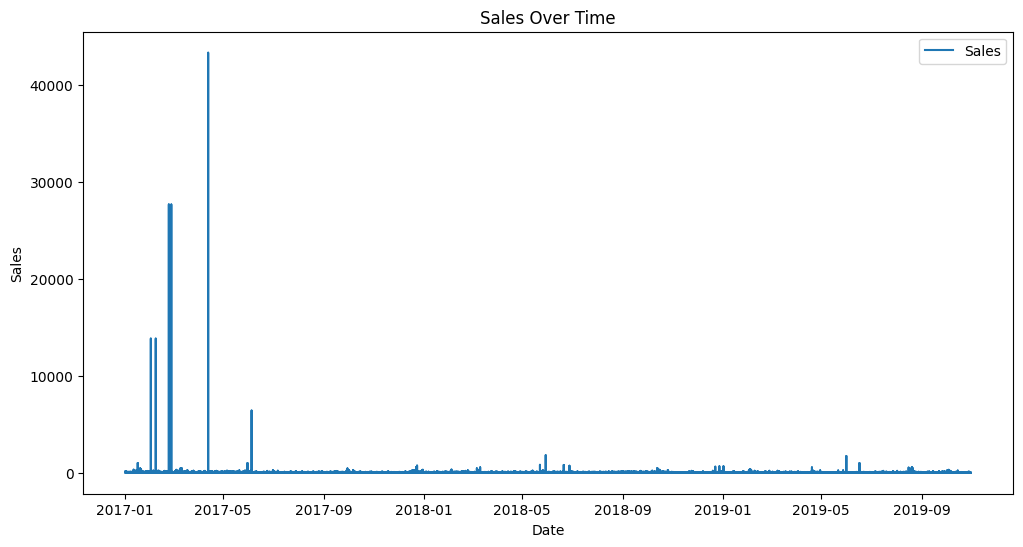

C:\Users\vishw\AppData\Local\Temp\ipykernel_5996\3659429065.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['sales'].resample('M').sum()


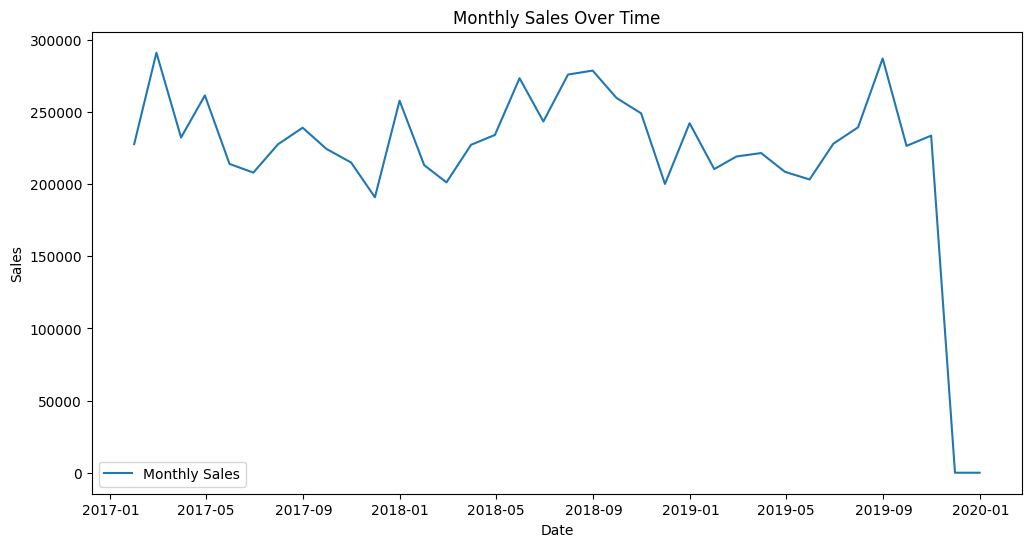

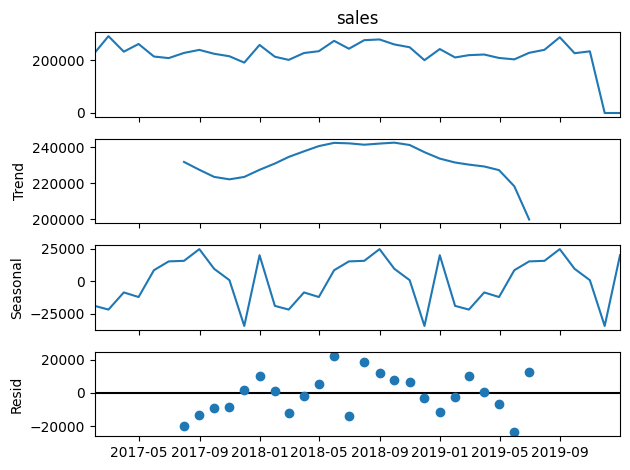

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -428.843
Date:                Mon, 17 Feb 2025   AIC                            863.687
Time:                        22:47:50   BIC                            868.353
Sample:                    01-31-2017   HQIC                           865.297
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9565      1.719     -0.557      0.578      -4.325       2.412
ma.L1          0.9388      1.873      0.501      0.616      -2.733       4.611
sigma2      2.358e+09   1.13e-08   2.09e+17      0.0

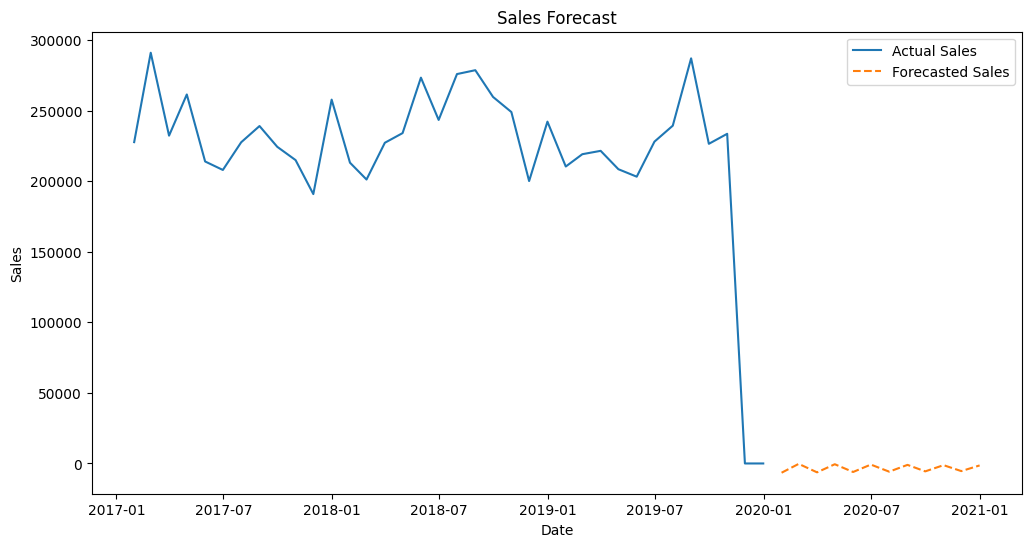

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Load your data
file_path = r'C:\Users\vishw\Downloads\archive (1)\sales.csv\sales.csv'  # Raw string notation to handle backslashes
print(f"Attempting to load file from: {file_path}")

try:
    df = pd.read_csv(file_path, low_memory=False)
    # Check the columns in the dataset
    print("Columns in the dataset:", df.columns)
    
    # Convert the 'date' column to datetime
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    print(df.head())

    # Visualize the data
    plt.figure(figsize=(12, 6))
    plt.plot(df['sales'], label='Sales')
    plt.title('Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

    # Resample and aggregate data to monthly level
    monthly_sales = df['sales'].resample('M').sum()
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_sales, label='Monthly Sales')
    plt.title('Monthly Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

    # Decompose the time series
    result = seasonal_decompose(monthly_sales, model='additive')
    result.plot()
    plt.show()

    # ARIMA model for forecasting
    model = ARIMA(monthly_sales, order=(1, 1, 1))
    model_fit = model.fit()
    print(model_fit.summary())

    # Forecast
    forecast = model_fit.forecast(steps=12)  # Forecast for the next 12 months
    print(forecast)
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_sales, label='Actual Sales')
    plt.plot(forecast, label='Forecasted Sales', linestyle='--')
    plt.title('Sales Forecast')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

except FileNotFoundError:
    print(f"File not found: {file_path}. Please check the file path and try again.")
except ValueError as ve:
    print(f"ValueError: {ve}")
except Exception as e:
    print(f"An error occurred: {e}")





